In [31]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

def qkhfs( w, h ):
    """
    Quick iterative calculation of kh in gravity-wave dispersion relationship
    kh = qkhfs(w, h )
    
    Input
        w - angular wave frequency = 2*pi/T where T = wave period [1/s]
        h - water depth [m]
    Returns
        kh - wavenumber * depth [m]

    Orbital velocities from kh are accurate to 3e-12 !

    RL Soulsby (2006) \"Simplified calculation of wave orbital velocities\"
    HR Wallingford Report TR 155, February 2006
    Eqns. 12a - 14
    """
    g = 9.81
    x = w**2.0 *h/g
    y = np.sqrt(x) * (x<1.) + x *(x>=1.)
    # This appalling bit of code is faster than a loop in Matlab and Fortran
    # but have not tested speed in Python.
    t = np.tanh( y )
    y = y-( (y*t -x)/(t+y*(1.0-t**2.0)))
    t = np.tanh( y )
    y = y-( (y*t -x)/(t+y*(1.0-t**2.0)))
    t = np.tanh( y )
    y = y-( (y*t -x)/(t+y*(1.0-t**2.0)))
    kh = y
    return kh

def ursell( aw, k, h ):
    """
    Calculate Ursell number
    Ur = ursell( aw, k, h)
        
    The Ursell number is a measure of asymmetry based on Stokes 2nd order
    wave equations and strictly speaking applies to shallow water (kh<1).
    It proportiona to the ratio of the 2nd order wave height term over
    the 1st order term.
    
    Input:
        aw = wave amplitude (H/2) [m/s]
        k  = wave number []
        h  = water depth [m]
        
    Returns:
        Ursell number
        
    Reussink et al. Eqn 6.
    """
    return (3./4.)*aw*k/(k*h)**3.

def urms_25( Hs, Tp, h ):
    """
    Calculate u_rms for JONSWAP spectr
    urms = urms_28( Hs, Tp, h )
    
    Equation 25 in Soulsby, R. L. (2006), "Simplified calculation of 
    wave orbital velocities". Report TR 155, Release 1.0, Feb. 2006.
    HR Wallingford.
    
    """
    Tz = Tp/1.28           # can't remember where I found this
    Tn = ( h/g )**(1./2.)                      # Eqn 8
    t = Tn /Tz                                 # Eqn 27
    A = (6500.+(0.56 + 15.54*t)**6)**(1./6.)   # Eqn 26
    urms_25 = (0.25*Hs/Tn) /((1.+A*t**2)**3)   # Eqn 25
    return urms_25

g = 9.81
rhos = 2650.
rho = 1040.
es = 0.01
Cs = 0.01
B = 0.
ws= 0.33
h = np.linspace(5,50,10)
H = 3.
T = 10.
w = 2.*np.pi/T
kh = qkhfs(w,h)
k = kh/h
L = np.pi*2./k
aw = H/2.
Ur = ursell(aw, k, h)
u0 = np.pi*H/(T*np.sinh(kh))
u0s = np.sqrt(2.)*urms_25(H, T, h)
u1 = 3.*np.pi**2*H**2/(4.*T*L*np.sinh(kh)**2)
u2 = 3.*np.pi**2*H**2/(4.*T*L*np.sinh(kh)**4)
K = 16*es*Cs*rho/(15.*np.pi*(rhos-rho)*g)
qs = K*(u0**3/ws)*(-5*u1-3*u2+B*u0**2/ws)
qss = K*(u0s**3/ws)*(-5*u1-3*u2+B*u0s**2/ws)

# Equilibrium profile
B0 = (ws/u0**2)*(5*u1+3*u2)
B0s = (ws/u0s**2)*(5*u1+3*u2)
print 'h=',h
print 'kh=',kh
print 'Ur=',Ur
print 'u0=',u0
print 'u0s=',u0s
print 'u1=',u1
print 'u2=',u2
print 'qs=',qs
print 'B0=',B0
print 'B0s=',B0s

h= [  5.  10.  15.  20.  25.  30.  35.  40.  45.  50.]
kh= [ 0.4641802   0.68019074  0.86426575  1.03651363  1.20474324  1.37292477
  1.5432809   1.71702844  1.89471566  2.07642263]
Ur= [ 1.04426159  0.24315941  0.10040762  0.05235673  0.03100441  0.01989472
  0.01349567  0.00953976  0.00696389  0.00521856]
u0= [ 1.95929248  1.28426249  0.96570193  0.76478672  0.62084081  0.51034225
  0.42204524  0.34981995  0.28997996  0.24010622]
u0s= [ 1.3356182   0.85115883  0.62679047  0.48903999  0.39310081  0.32144629
  0.26566536  0.22113968  0.18504726  0.15550402]
u1= [ 0.42539908  0.13391206  0.06413921  0.03618321  0.02217157  0.01422754
  0.00937511  0.0062703   0.00422619  0.00285781]
u2= [  1.83845427e+00   2.48648043e-01   6.73391431e-02   2.38256916e-02
   9.62087714e-03   4.17167756e-03   1.87997518e-03   8.63843237e-04
   4.00076119e-04   1.85480614e-04]
qs= [ -3.89429253e-04  -2.03130903e-05  -3.18930745e-06  -7.64895142e-07
  -2.26518765e-07  -7.53300372e-08  -2.67465443e-08  -9.84

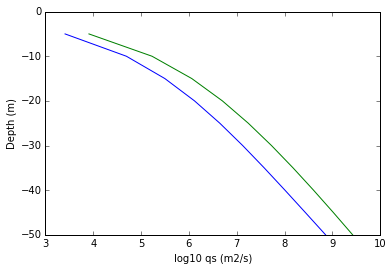

In [29]:
# reproduce Fig. 1. This does not exactly match. Maybe needs different ws (in K)?
fig = plt.figure()
plt.plot(-np.log10(-qs),-h)
plt.plot(-np.log10(-qss),-h)
plt.ylim(ymax=0., ymin=-50)
plt.xlabel('log10 qs (m2/s)')
plt.ylabel('Depth (m)')